In [1]:
using Plots

H_base = [4.08, 3.14]
H_adap = [5.27, 1.84]

Lac = 1
Lbd = 6.17
Lcd = 4.99
Lde = 1.82
Lik = Lhi = Ljl = 1.75
Lkl = Lij = Llp = 9.19

N = 359
ptA = zeros(N,2) 
ptB = [4.72, -3.83]
θ₁ = range(0,2π,length = N)

0.0:0.01755079694742901:6.283185307179586

In [2]:
ptC = ptA + [Lac*cos.(θ₁) Lac*sin.(θ₁)]

s₁ = ptB[1] .- ptC[:,1]
s₂ = ptB[2] .- ptC[:,2] 

s = sqrt.(s₁.^2 .+ s₂.^2)
θₛ = atan.(s₂, s₁)
θ₃ = θₛ + acos.((s.^2 .+ Lcd .^2 .- Lbd .^2) ./ (s .* 2 .* Lcd)) 
θ₄ = θₛ + acos.((-s.^2 .+ Lcd .^2 .- Lbd .^2) ./ (s .* 2 .* Lbd)) 

ptD = ptC .+ [Lcd.*cos.(θ₃) Lcd.*sin.(θ₃)]

λ = θ₃ .- π/2

ptE = ptK = ptD .+ [Lde.*cos.(λ) Lde.*sin.(λ)] 
ptL = ptK .+ [Lkl.*cos.(λ) Lkl.*sin.(λ)]
ptI = ptK .+ [Lik.*cos.(90 .+ λ) Lik.*sin.(90 .+ λ)]
ptH = ptI .+ [-Lhi.*cos.(λ) -Lhi.*sin.(λ)]
ptJ = ptL .+ [Ljl.*cos.(90 .+ λ) Ljl.*sin.(90 .+ λ)]
ptP₁ = ptL .+ [-Llp.*cos.(45) 0]
ptP = ptP₁ .+ [0 -Llp.*sin.(45)]




359×2 Matrix{Float64}:
 5.67395  -15.2923
 5.64227  -15.3147
 5.61025  -15.3368
 5.57792  -15.3585
 5.54527  -15.3799
 5.51233  -15.4011
 5.47912  -15.4218
 5.44563  -15.4423
 5.4119   -15.4624
 5.37793  -15.4822
 5.34374  -15.5016
 5.30935  -15.5206
 5.27476  -15.5393
 ⋮        
 5.99613  -15.0293
 5.96909  -15.0543
 5.94155  -15.0791
 5.91354  -15.1037
 5.88506  -15.1282
 5.85614  -15.1524
 5.82678  -15.1763
 5.797    -15.2001
 5.76681  -15.2235
 5.73623  -15.2467
 5.70527  -15.2697
 5.67395  -15.2923

┌ Info: Saved animation to 
│   fn = C:\Users\juwon\Downloads\Research Polytechnique Montreal\circle.gif
└ @ Plots C:\Users\juwon\.julia\packages\Plots\YAlrZ\src\animation.jl:114


Plots.AnimatedGif("C:\\Users\\juwon\\Downloads\\Research Polytechnique Montreal\\circle.gif")
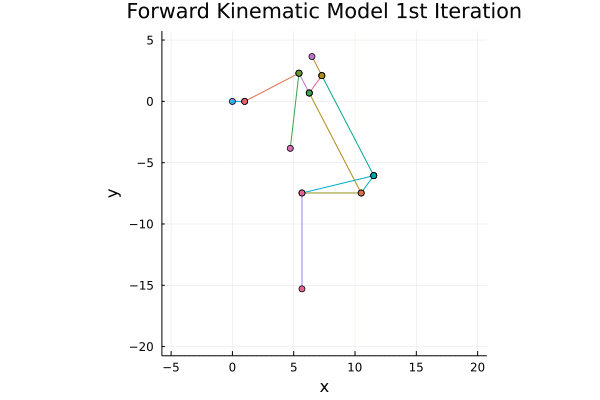

In [3]:
function animation()
    anim = @animate for i in 1:N

        plot([ptA[i,1],ptC[i,1]],[ptA[i,2],ptC[i,2]])
        plot!([ptC[i,1],ptD[i,1]],[ptC[i,2],ptD[i,2]])
        plot!([ptB[1],ptD[i,1]],[ptB[2],ptD[i,2]])
        plot!([ptD[i,1],ptE[i,1]],[ptD[i,2],ptE[i,2]])
        plot!([ptK[i,1],ptL[i,1]],[ptK[i,2],ptL[i,2]])
        plot!([ptL[i,1],ptJ[i,1]],[ptL[i,2],ptJ[i,2]])
        plot!([ptK[i,1],ptI[i,1]],[ptK[i,2],ptI[i,2]])
        plot!([ptI[i,1],ptH[i,1]],[ptI[i,2],ptH[i,2]])
        plot!([ptI[i,1],ptJ[i,1]],[ptI[i,2],ptJ[i,2]])
        plot!([ptL[i,1],ptP₁[i,1]],[ptL[i,2],ptP₁[i,2]])
        plot!([ptJ[i,1],ptP₁[i,1]],[ptJ[i,2],ptP₁[i,2]])
        plot!([ptP[i,1],ptP₁[i,1]],[ptP[i,2],ptP₁[i,2]])
    
        scatter!([ptA[i,1],ptC[i,1]],[ptA[i,2],ptC[i,2]])
        scatter!([ptC[i,1],ptD[i,1]],[ptC[i,2],ptD[i,2]])
        scatter!([ptB[1],ptD[i,1]],[ptB[2],ptD[i,2]])
        scatter!([ptD[i,1],ptE[i,1]],[ptD[i,2],ptE[i,2]])
        scatter!([ptK[i,1],ptL[i,1]],[ptK[i,2],ptL[i,2]])
        scatter!([ptL[i,1],ptJ[i,1]],[ptL[i,2],ptJ[i,2]])
        scatter!([ptK[i,1],ptI[i,1]],[ptK[i,2],ptI[i,2]])
        scatter!([ptI[i,1],ptH[i,1]],[ptI[i,2],ptH[i,2]])
        scatter!([ptI[i,1],ptJ[i,1]],[ptI[i,2],ptJ[i,2]])
        scatter!([ptJ[i,1],ptP₁[i,1]],[ptJ[i,2],ptP₁[i,2]])
        scatter!([ptP[i,1],ptP₁[i,1]],[ptP[i,2],ptP₁[i,2]])
    
        plot!(xlabel = "x", ylabel = "y",xlims=[-5.,20.],ylims=[-20.,5.])
        plot!(legend=false,aspect_ratio=:equal, title = "Forward Kinematic Model 1st Iteration")
    end
    
    gif(anim, "circle.gif", fps = 10)
end

animation()


In [4]:
ptH = H_adap 

dᵢ = sqrt.((ptH[1] .- ptK[:,1]).^2 .+ (ptH[2] .- ptK[:,2]).^2)
ϕ = acos.((Lhi .^2 .- (Lik.^2 .+ dᵢ.^2)) ./ (-2 .* dᵢ .* Lik))
a = atan.(ptH[2] .- ptE[:,2], ptH[1] .- ptE[:,1])

ptI = ptK .+ [Lik.*cos.(a-ϕ) Lik.*sin.(a-ϕ)]
b = atan.(ptI[:,2] .- ptH[2], ptI[:,1] .- ptH[1]) 

ptL = ptK .+ [Lkl.*cos.(b) Lkl.*sin.(b)]
ptJ = ptL .+ [Ljl.*cos.(a-ϕ) Ljl.*sin.(a-ϕ)] 
ptP = ptL .- [Llp.*cos.(a-ϕ) Llp.*sin.(a-ϕ)]
ptP₁ = ptP + [Llp.*cos.(a.-ϕ.+ π ./6) Llp.*sin.(a.-ϕ.+ π ./ 6)]
xCoordinate = ptP[end,1]
yCoordinate = ptP[end,2]
E₁ = ptE[end,1]
E₂ = ptE[end,2]


0.6838535401232018

┌ Info: Saved animation to 
│   fn = C:\Users\juwon\Downloads\Research Polytechnique Montreal\circle2.gif
└ @ Plots C:\Users\juwon\.julia\packages\Plots\YAlrZ\src\animation.jl:114


Plots.AnimatedGif("C:\\Users\\juwon\\Downloads\\Research Polytechnique Montreal\\circle2.gif")
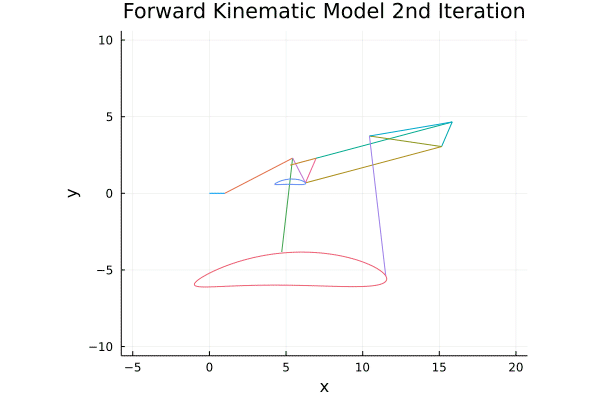

In [5]:
function animation2()
    anim = @animate for i in 1:N

        plot([ptA[i,1],ptC[i,1]],[ptA[i,2],ptC[i,2]])
        plot!([ptC[i,1],ptD[i,1]],[ptC[i,2],ptD[i,2]])
        plot!([ptB[1],ptD[i,1]],[ptB[2],ptD[i,2]])
        plot!([ptD[i,1],ptE[i,1]],[ptD[i,2],ptE[i,2]])
        plot!([ptK[i,1],ptL[i,1]],[ptK[i,2],ptL[i,2]])
        plot!([ptL[i,1],ptJ[i,1]],[ptL[i,2],ptJ[i,2]])
        plot!([ptK[i,1],ptI[i,1]],[ptK[i,2],ptI[i,2]])
        plot!([ptI[i,1],ptH[1]],[ptI[i,2],ptH[2]])
        plot!([ptI[i,1],ptJ[i,1]],[ptI[i,2],ptJ[i,2]])
        plot!([ptL[i,1],ptP₁[i,1]],[ptL[i,2],ptP₁[i,2]])
        plot!([ptJ[i,1],ptP₁[i,1]],[ptJ[i,2],ptP₁[i,2]])
        plot!([ptP[i,1],ptP₁[i,1]],[ptP[i,2],ptP₁[i,2]])
    
#         scatter!([ptA[i,1],ptC[i,1]],[ptA[i,2],ptC[i,2]])
#         scatter!([ptC[i,1],ptD[i,1]],[ptC[i,2],ptD[i,2]])
#         scatter!([ptB[1],ptD[i,1]],[ptB[2],ptD[i,2]])
#         scatter!([ptD[i,1],ptE[i,1]],[ptD[i,2],ptE[i,2]])
#         scatter!([ptK[i,1],ptL[i,1]],[ptK[i,2],ptL[i,2]])
#         scatter!([ptL[i,1],ptJ[i,1]],[ptL[i,2],ptJ[i,2]])
#         scatter!([ptK[i,1],ptI[i,1]],[ptK[i,2],ptI[i,2]])
#         scatter!([ptI[i,1],ptH[1]],[ptI[i,2],ptH[2]])
#         scatter!([ptI[i,1],ptJ[i,1]],[ptI[i,2],ptJ[i,2]])
#         scatter!([ptJ[i,1],ptP₁[i,1]],[ptJ[i,2],ptP₁[i,2]])
#         scatter!([ptP[i,1],ptP₁[i,1]],[ptP[i,2],ptP₁[i,2]])
    
        plot!(xlabel = "x", ylabel = "y",xlims=[-5.,20.],ylims=[-10.,10.])
        plot!(legend=false,aspect_ratio=:equal, title = "Forward Kinematic Model 2nd Iteration")
       
        plot!(ptE[:,1],ptE[:,2])
        #plot!(ptI[:,1],ptI[:,2])
        plot!(ptP[:,1],ptP[:,2])
    
    end
    
    gif(anim, "circle2.gif", fps = 10)
end

animation2()


In [6]:
θₐ = π
ptC = ptA .+ [Lac.*cos.(θₐ) Lac.*sin.(θₐ)]

s₁ = ptB[1] .- ptC[:,1]
s₂ = ptB[2] .- ptC[:,2] 

s = sqrt.(s₁.^2 .+ s₂.^2)
θₛ = atan.(s₂, s₁)
θ₃ = θₛ + acos.((s.^2 .+ Lcd .^2 .- Lbd .^2) ./ (s .* 2 .* Lcd)) 
θ₄ = θₛ + acos.((-s.^2 .+ Lcd .^2 .- Lbd .^2) ./ (s .* 2 .* Lbd)) 

ptD = ptC .+ [Lcd.*cos.(θ₃) Lcd.*sin.(θ₃)]

λ = θ₃ .- π/2

ptE = ptK = ptD .+ [Lde.*cos.(λ) Lde.*sin.(λ)] 

Hₛ = -((H_base[2] - H_adap[2]) / (H_base[1] - H_adap[1])) ^ (-1)
Hₘ = [(H_base[1] + H_adap[1])/2 (H_base[2] + H_adap[2])/2]
H₁ = 2 #this is input
H₂ = Hₛ * (H₁ - Hₘ[1]) + Hₘ[2]
ptHⱼ = [H₁, H₂]
dₕ₁ = sqrt.((ptHⱼ[1] .- H_base[1]).^2 .+ (ptHⱼ[2] .- H_base[2]).^2)
dₕ₂ = sqrt.((ptHⱼ[1] .- Hₘ[1]).^2 .+ (ptHⱼ[2] .- Hₘ[2]).^2)
dₕ₃ = sqrt.((ptHⱼ[1] .- H_adap[1]).^2 .+ (ptHⱼ[2] .- H_adap[2]).^2)
dₕ₄ = sqrt.((ptHⱼ[1] .- H_adap[1]).^2 .+ (ptHⱼ[2] .- H₂).^2)
θₕ₁ = acos(dₕ₄/dₕ₃)
θₕ₂= 2 * acos(dₕ₂/dₕ₁)

θₕ = range(θₕ₁,θₕ₂.+θₕ₁,length = N)
ptH = [H₁.+(dₕ₁.*cos.(θₕ)) H₂.+(dₕ₁.*sin.(θₕ))]

dᵢ = sqrt.((ptH[:,1] .- ptK[:,1]).^2 .+ (ptH[:,2] .- ptK[:,2]).^2)
ϕ = acos.((Lhi .^2 .- (Lik.^2 .+ dᵢ.^2)) ./ (-2 .* dᵢ .* Lik))
a = atan.(ptH[:,2] .- ptE[:,2], ptH[:,1] .- ptE[:,1])

ptI = ptK .+ [Lik.*cos.(a-ϕ) Lik.*sin.(a-ϕ)]
b = atan.(ptI[:,2] .- ptH[:,2], ptI[:,1] .- ptH[:,1]) 

ptL = ptK .+ [Lkl.*cos.(b) Lkl.*sin.(b)]
ptJ = ptL .+ [Ljl.*cos.(a-ϕ) Ljl.*sin.(a-ϕ)] 
ptP = ptL .- [Llp.*cos.(a-ϕ) Llp.*sin.(a-ϕ)]
ptP₁ = ptP + [Llp.*cos.(a.-ϕ.+ π ./6) Llp.*sin.(a.-ϕ.+ π ./ 6)]



359×2 Matrix{Float64}:
 7.76624  -3.03119
 7.76835  -3.02385
 7.7704   -3.01655
 7.77238  -3.00929
 7.7743   -3.00208
 7.77615  -2.99492
 7.77794  -2.9878
 7.77966  -2.98073
 7.78132  -2.9737
 7.78292  -2.96672
 7.78446  -2.95979
 7.78593  -2.95291
 7.78734  -2.94607
 ⋮        
 6.71039  -3.64765
 6.70639  -3.65797
 6.70239  -3.66834
 6.69841  -3.67875
 6.69443  -3.68921
 6.69046  -3.69971
 6.6865   -3.71025
 6.68254  -3.72083
 6.6786   -3.73146
 6.67466  -3.74213
 6.67073  -3.75284
 6.66681  -3.7636

┌ Info: Saved animation to 
│   fn = C:\Users\juwon\Downloads\Research Polytechnique Montreal\circle3.gif
└ @ Plots C:\Users\juwon\.julia\packages\Plots\YAlrZ\src\animation.jl:114


Plots.AnimatedGif("C:\\Users\\juwon\\Downloads\\Research Polytechnique Montreal\\circle3.gif")
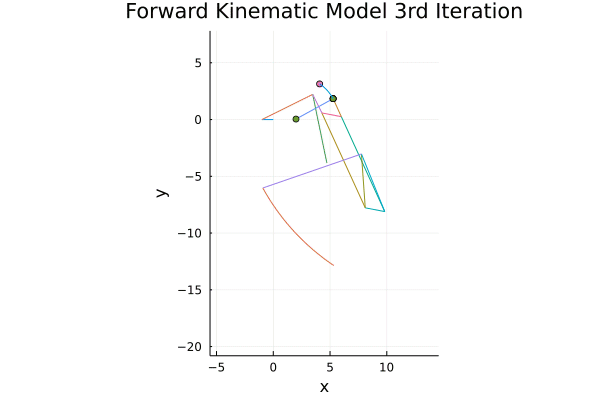

In [7]:
function animation3()
    anim = @animate for i in 1:N

        plot([ptA[i,1],ptC[i,1]],[ptA[i,2],ptC[i,2]])
        plot!([ptC[i,1],ptD[i,1]],[ptC[i,2],ptD[i,2]])
        plot!([ptB[1],ptD[i,1]],[ptB[2],ptD[i,2]])
        plot!([ptD[i,1],ptE[i,1]],[ptD[i,2],ptE[i,2]])
        plot!([ptK[i,1],ptL[i,1]],[ptK[i,2],ptL[i,2]])
        plot!([ptL[i,1],ptJ[i,1]],[ptL[i,2],ptJ[i,2]])
        plot!([ptK[i,1],ptI[i,1]],[ptK[i,2],ptI[i,2]])
        plot!([ptI[i,1],ptH[i,1]],[ptI[i,2],ptH[i,2]])
        plot!([ptI[i,1],ptJ[i,1]],[ptI[i,2],ptJ[i,2]])
        plot!([ptL[i,1],ptP₁[i,1]],[ptL[i,2],ptP₁[i,2]])
        plot!([ptJ[i,1],ptP₁[i,1]],[ptJ[i,2],ptP₁[i,2]])
        plot!([ptP[i,1],ptP₁[i,1]],[ptP[i,2],ptP₁[i,2]])
        plot!([ptHⱼ[1],ptH[i,1]],[ptHⱼ[2],ptH[i,2]])
    
#         scatter!([ptA[i,1],ptC[i,1]],[ptA[i,2],ptC[i,2]])
#         scatter!([ptC[i,1],ptD[i,1]],[ptC[i,2],ptD[i,2]])
#         scatter!([ptB[1],ptD[i,1]],[ptB[2],ptD[i,2]])
#         scatter!([ptD[i,1],ptE[i,1]],[ptD[i,2],ptE[i,2]])
#         scatter!([ptK[i,1],ptL[i,1]],[ptK[i,2],ptL[i,2]])
#         scatter!([ptL[i,1],ptJ[i,1]],[ptL[i,2],ptJ[i,2]])
#         scatter!([ptK[i,1],ptI[i,1]],[ptK[i,2],ptI[i,2]])
#         scatter!([ptI[i,1],ptH[i,1]],[ptI[i,2],ptH[i,2]])
#         scatter!([ptI[i,1],ptJ[i,1]],[ptI[i,2],ptJ[i,2]])
#         scatter!([ptJ[i,1],ptP₁[i,1]],[ptJ[i,2],ptP₁[i,2]])
#         scatter!([ptP[i,1],ptP₁[i,1]],[ptP[i,2],ptP₁[i,2]])
        
        #scatter!([H_adap[1],H_adap[2]])
        #scatter!([H_base[1],H_base[2]])
        #scatter!([ptHⱼ[1],ptHⱼ[2]])
        

        plot!(xlabel = "x", ylabel = "y",xlims=[-5.,14.],ylims=[-20.,7.])
        plot!(legend=false,aspect_ratio=:equal, title = "Forward Kinematic Model 3rd Iteration")
        
        #plot!(H_adap[1],H_adap[2])
        #plot!(H_base[1],H_base[2])
        scatter!([H_adap[1],ptH[i,1]],[H_adap[2],ptH[i,2]])
        scatter!([H_base[1],ptH[i,1]],[H_base[2],ptH[i,2]])
        scatter!([ptHⱼ[1],ptH[i,1]],[ptHⱼ[2],ptH[i,2]])
        
    #scatter!([ptHⱼ[1],ptHⱼ[2]])
        plot!(ptH[:,1],ptH[:,2])
        plot!(ptP[:,1],ptP[:,2])
        
    end
    
    gif(anim, "circle3.gif", fps = 10)
end

animation3()


In [8]:
trajectP = zeros(1,2)
maxP = minP = zeros(361,2)

for i in 0:1:359
    θₐ = i * π/180
    ptC = ptA .+ [Lac.*cos.(θₐ) Lac.*sin.(θₐ)]
    
    s₁ = ptB[1] .- ptC[:,1]
    s₂ = ptB[2] .- ptC[:,2] 
    
    s = sqrt.(s₁.^2 .+ s₂.^2)
    θₛ = atan.(s₂, s₁)
    θ₃ = θₛ + acos.((s.^2 .+ Lcd .^2 .- Lbd .^2) ./ (s .* 2 .* Lcd)) 
    θ₄ = θₛ + acos.((-s.^2 .+ Lcd .^2 .- Lbd .^2) ./ (s .* 2 .* Lbd)) 
    
    ptD = ptC .+ [Lcd.*cos.(θ₃) Lcd.*sin.(θ₃)]
    
    λ = θ₃ .- π/2
    
    ptE = ptK = ptD .+ [Lde.*cos.(λ) Lde.*sin.(λ)] 
    
    Hₛ = -((H_base[2] - H_adap[2]) / (H_base[1] - H_adap[1])) ^ (-1)
    Hₘ = [(H_base[1] + H_adap[1])/2 (H_base[2] + H_adap[2])/2]
    H₁ = 2 #this is input
    H₂ = Hₛ * (H₁ - Hₘ[1]) + Hₘ[2]
    ptHⱼ = [H₁, H₂]
    dₕ₁ = sqrt.((ptHⱼ[1] .- H_base[1]).^2 .+ (ptHⱼ[2] .- H_base[2]).^2)
    dₕ₂ = sqrt.((ptHⱼ[1] .- Hₘ[1]).^2 .+ (ptHⱼ[2] .- Hₘ[2]).^2)
    dₕ₃ = sqrt.((ptHⱼ[1] .- H_adap[1]).^2 .+ (ptHⱼ[2] .- H_adap[2]).^2)
    dₕ₄ = sqrt.((ptHⱼ[1] .- H_adap[1]).^2 .+ (ptHⱼ[2] .- H₂).^2)
    θₕ₁ = acos(dₕ₄/dₕ₃)
    θₕ₂= 2 * acos(dₕ₂/dₕ₁)
    
    θₕ = range(θₕ₁,θₕ₂.+θₕ₁,length = N)
    
    ptH = [H₁.+(dₕ₁.*cos.(θₕ)) H₂.+(dₕ₁.*sin.(θₕ))]
    
    dᵢ = sqrt.((ptH[:,1] .- ptK[:,1]).^2 .+ (ptH[:,2] .- ptK[:,2]).^2)
    ϕ = acos.((Lhi .^2 .- (Lik.^2 .+ dᵢ.^2)) ./ (-2 .* dᵢ .* Lik))
    a = atan.(ptH[:,2] .- ptE[:,2], ptH[:,1] .- ptE[:,1])
    
    ptI = ptK .+ [Lik.*cos.(a-ϕ) Lik.*sin.(a-ϕ)]
    b = atan.(ptI[:,2] .- ptH[:,2], ptI[:,1] .- ptH[:,1]) 
    
    ptL = ptK .+ [Lkl.*cos.(b) Lkl.*sin.(b)]
    ptJ = ptL .+ [Ljl.*cos.(a-ϕ) Ljl.*sin.(a-ϕ)] 
    ptP = ptL .- [Llp.*cos.(a-ϕ) Llp.*sin.(a-ϕ)]

    ptP₁ = ptP + [Llp.*cos.(a.-ϕ.+ π ./6) Llp.*sin.(a.-ϕ.+ π ./ 6)]
    if i == 0 
        trajectP = ptP
    else 
        trajectP = [trajectP;ptP]
    end
  
end


xTrajectP = sort(unique(floor.(trajectP[:,1], digits = 1)))
truncP = floor.(trajectP, digits = 1)
m = 0
for i in 1:size(xTrajectP[:,1],1)
    c = findall(x->x==xTrajectP[i,1], truncP)
    l = LinearIndices(truncP)
    j = l[c]
    n = size(j,1)
    ytraject = zeros(n, 1)
    for x in 1:n
        ytraject[x] = trajectP[j[x],2]
    end
  
    if i == 1 
        minP = [xTrajectP[i,1] minimum(ytraject)]
    elseif i == 130
            maxP = [xTrajectP[i,1] maximum(ytraject)]
    else
        if xTrajectP[i,1] <= -0.9487374710476335 || xTrajectP[i,1] >= 11.71
            maxP = [[xTrajectP[i,1] maximum(ytraject)]; maxP]
        end 
            minP = [[xTrajectP[i,1] minimum(ytraject)]; minP]
    end

end

cycle = [maxP;sortslices(minP, dims=1, by=x->x[1], rev = false)]
cycle = [sortslices(minP, dims=1, by=x->x[1], rev = false);cycle]



436×2 Matrix{Float64}:
 -1.0   -6.10102
 -0.9   -6.28055
 -0.8   -6.45109
 -0.7   -6.61829
 -0.6   -6.7867
 -0.5   -6.94192
 -0.4   -7.10632
 -0.3   -7.25972
 -0.2   -7.41219
 -0.1   -7.55364
  0.0   -7.7042
  0.1   -7.84256
  0.2   -7.989
  ⋮    
 16.7  -12.8775
 16.8  -12.8649
 16.9  -12.8501
 17.0  -12.8419
 17.1  -12.8236
 17.2  -12.803
 17.3  -12.7798
 17.4  -12.7541
 17.5  -12.7258
 17.6  -12.6784
 17.7  -12.6058
 17.8  -12.4772

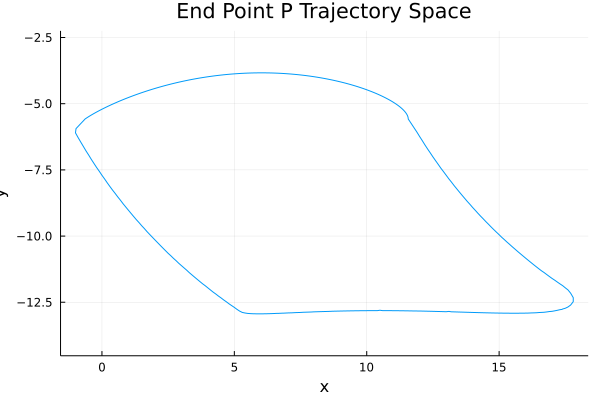

In [9]:
θₐ = range(0,2π,length = N)
ptC = ptA .+ [Lac.*cos.(θₐ) Lac.*sin.(θₐ)]

s₁ = ptB[1] .- ptC[:,1]
s₂ = ptB[2] .- ptC[:,2] 

s = sqrt.(s₁.^2 .+ s₂.^2)
θₛ = atan.(s₂, s₁)
θ₃ = θₛ + acos.((s.^2 .+ Lcd .^2 .- Lbd .^2) ./ (s .* 2 .* Lcd)) 
θ₄ = θₛ + acos.((-s.^2 .+ Lcd .^2 .- Lbd .^2) ./ (s .* 2 .* Lbd)) 

ptD = ptC .+ [Lcd.*cos.(θ₃) Lcd.*sin.(θ₃)]

λ = θ₃ .- π/2

ptE = ptK = ptD .+ [Lde.*cos.(λ) Lde.*sin.(λ)] 

Hₛ = -((H_base[2] - H_adap[2]) / (H_base[1] - H_adap[1])) ^ (-1)
Hₘ = [(H_base[1] + H_adap[1])/2 (H_base[2] + H_adap[2])/2]
H₁ = 2 #this is input
H₂ = Hₛ * (H₁ - Hₘ[1]) + Hₘ[2]
ptHⱼ = [H₁, H₂]
dₕ₁ = sqrt.((ptHⱼ[1] .- H_base[1]).^2 .+ (ptHⱼ[2] .- H_base[2]).^2)
dₕ₂ = sqrt.((ptHⱼ[1] .- Hₘ[1]).^2 .+ (ptHⱼ[2] .- Hₘ[2]).^2)
dₕ₃ = sqrt.((ptHⱼ[1] .- H_adap[1]).^2 .+ (ptHⱼ[2] .- H_adap[2]).^2)
dₕ₄ = sqrt.((ptHⱼ[1] .- H_adap[1]).^2 .+ (ptHⱼ[2] .- H₂).^2)
θₕ₁ = acos(dₕ₄/dₕ₃)
θₕ₂= 2 * acos(dₕ₂/dₕ₁)


θₕ = θₕ₂.+θₕ₁
ptH = [H₁.+(dₕ₁.*cos.(θₕ)) H₂.+(dₕ₁.*sin.(θₕ))]

dᵢ = sqrt.((ptH[:,1] .- ptK[:,1]).^2 .+ (ptH[:,2] .- ptK[:,2]).^2)
ϕ = acos.((Lhi .^2 .- (Lik.^2 .+ dᵢ.^2)) ./ (-2 .* dᵢ .* Lik))
a = atan.(ptH[:,2] .- ptE[:,2], ptH[:,1] .- ptE[:,1])

ptI = ptK .+ [Lik.*cos.(a-ϕ) Lik.*sin.(a-ϕ)]
b = atan.(ptI[:,2] .- ptH[:,2], ptI[:,1] .- ptH[:,1]) 

ptL = ptK .+ [Lkl.*cos.(b) Lkl.*sin.(b)]
ptJ = ptL .+ [Ljl.*cos.(a-ϕ) Ljl.*sin.(a-ϕ)] 
ptP = ptL .- [Llp.*cos.(a-ϕ) Llp.*sin.(a-ϕ)]

sorted = sortslices(ptP, dims=1, by=x->x[1])
minimumP = zeros(1,2)
for i in 1:size(sorted,1)
    if sorted[i,2] < sorted[begin,2]
        minimumP = [sorted[i,1] sorted[i,2]]
    end
end
minP = sortslices([minimumP;minP], dims=1, by=x->x[1], rev = false)
    
#p4 = plot(ptP[:,1],ptP[:,2])

θₕ = θₕ₁
ptH = [H₁.+(dₕ₁.*cos.(θₕ)) H₂.+(dₕ₁.*sin.(θₕ))]

dᵢ = sqrt.((ptH[:,1] .- ptK[:,1]).^2 .+ (ptH[:,2] .- ptK[:,2]).^2)
ϕ = acos.((Lhi .^2 .- (Lik.^2 .+ dᵢ.^2)) ./ (-2 .* dᵢ .* Lik))
a = atan.(ptH[:,2] .- ptE[:,2], ptH[:,1] .- ptE[:,1])

ptI = ptK .+ [Lik.*cos.(a-ϕ) Lik.*sin.(a-ϕ)]
b = atan.(ptI[:,2] .- ptH[:,2], ptI[:,1] .- ptH[:,1]) 

ptL = ptK .+ [Lkl.*cos.(b) Lkl.*sin.(b)]
ptJ = ptL .+ [Ljl.*cos.(a-ϕ) Ljl.*sin.(a-ϕ)] 
ptP = ptL .- [Llp.*cos.(a-ϕ) Llp.*sin.(a-ϕ)]

sorted = sortslices(ptP, dims=1, by=x->x[1])
maximumP = [sorted[begin,1] sorted[begin,2]]
for i in 1:size(sorted,1)
    if sorted[i,2] >= sorted[end,2]
        if i == 1
            maximumP = [sorted[i,1] sorted[i,2]]
        else
            maximumP = [[sorted[i,1] sorted[i,2]];maximumP]
        end
    end
end


maxP = sortslices([maximumP;maxP], dims=1, by=x->x[1], rev = true)
    
cycle = [maxP;sortslices(minP, dims=1, by=x->x[1], rev = false)]
cycle = [sortslices(minP, dims=1, by=x->x[1], rev = false);cycle]

plot(cycle[:,1], cycle[:,2])
plot!(xlabel = "x", ylabel = "y")
plot!(legend=false,aspect_ratio=:equal, title = "End Point P Trajectory Space")



In [10]:
p1 = plot(trajectP[:,1], trajectP[:,2])
plot!(xlabel = "x", ylabel = "y")
plot!(legend=false,aspect_ratio=:equal, title = "End Point P Trajectory Space")
#plot!(cycle[:,1], cycle[:,2])
# p2 = plot(cycle[:,1], cycle[:,2])

# plot(p1,p2)


In [11]:
println("Enter x coordinate")

#xCoordinate = readline()
#xCoordinate = floor(parse(Float64, xCoordinate), digits = 14)

println("Enter coordinates of y")

#yCoordinate = readline()
#yCoordinate = floor(parse(Float64, yCoordinate), digits = 14) 

xCoordinate = 11.521430633961872  
yCoordinate = -5.416274154092425



# E₁ = ptE[1,1]
# E₂ = ptE[1,2]
println("The coordinates are ", xCoordinate, ", ", yCoordinate)



Enter x coordinate
Enter coordinates of y
The coordinates are 11.521430633961872, -5.416274154092425


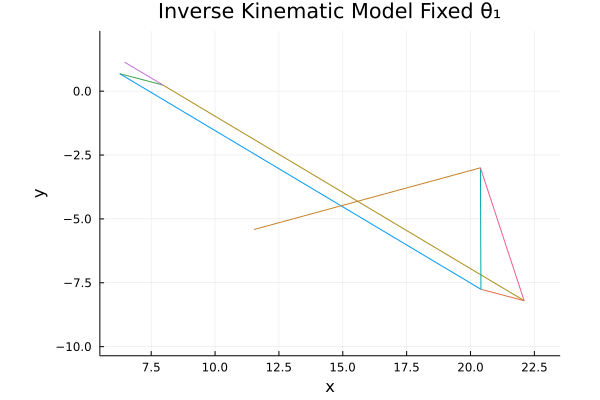

In [12]:
function valid(xCoordinate, yCoordinate)
    ca = findall(x->x== xCoordinate, trajectP)
    la = LinearIndices(trajectP)
    ja = la[ca]
    na = size(ja,1)
    if na == 0
        println("doesnt exist")
        return false
    end
    for x in 1:na
        if trajectP[ja[x],2] == yCoordinate
            return true
            break
        end
    end
    println("not valid")
    return false
end

function inverse_kinematics1(xCoordinate, yCoordinate)
    #fixed theta1 iteration
    Δ₁ = E₁ - (xCoordinate)
    Δ₂ = E₂ - (yCoordinate)
    Lpe = sqrt(Δ₁^2 + Δ₂^2)
    γ = atan(Δ₂,Δ₁)
    Θ = π - (γ + acos((Lkl^2 - (Lpe^2 + Llp^2)) / (-2*Llp*Lpe)))
    
    ptL = [xCoordinate+Llp*cos(Θ) yCoordinate+Llp*sin(Θ)]
    ptJ = ptL + [Ljl*cos(Θ) Ljl*sin(Θ)]
    ptI = [E₁+Lik*cos(Θ) E₂+Lik*sin(Θ)]
    
    Δ₁₁ = ptI[1,1] - ptJ[1,1]
    Δ₁₂ = ptI[1,2] - ptJ[1,2]
    β = atan(abs(Δ₁₂/Δ₁₁))
    ptH = ptI + [-Lhi*cos(β) Lhi*sin(β)]
    ptP₁ = [xCoordinate + Llp*cos(Θ + (π/6)) yCoordinate + Llp*sin(Θ + (π/6))]
    
    plot([ptK[1,1],ptL[1,1]],[ptK[1,2],ptL[1,2]])
    plot!([ptL[1,1],ptJ[1,1]],[ptL[1,2],ptJ[1,2]])
    plot!([ptK[1,1],ptI[1,1]],[ptK[1,2],ptI[1,2]])
    plot!([ptI[1,1],ptH[1]],[ptI[1,2],ptH[2]])
    plot!([ptI[1,1],ptJ[1,1]],[ptI[1,2],ptJ[1,2]])
    plot!([ptL[1,1],ptP₁[1,1]],[ptL[1,2],ptP₁[1,2]])
    plot!([ptJ[1,1],ptP₁[1,1]],[ptJ[1,2],ptP₁[1,2]])
    plot!([xCoordinate,ptP₁[1,1]],[yCoordinate,ptP₁[1,2]])


    plot!(xlabel = "x", ylabel = "y",xlims=[6.,23.],ylims=[-10,2.])
    plot!(legend=false, aspect_ratio=:equal, title = "Inverse Kinematic Model Fixed θ₁")
end


            


isValid = valid(xCoordinate, yCoordinate) #fix trajectP
if isValid == true
    inverse_kinematics1(xCoordinate, yCoordinate)
end

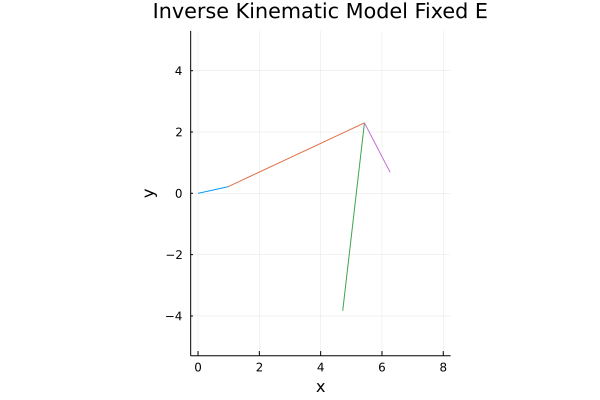

In [13]:

function inverse_kinematics2(xCoordinate, yCoordinate)
    #known ptE
    Δ₃ = E₁ - ptB[1]
    Δ₄ = E₂ - ptB[2]
    θ₄₁ = atan(abs(Δ₄/Δ₃))
    θ₄₂ = acos((Lde^2 - (Lbd^2 + Δ₃^2 + Δ₄^2 )) / (-2 * Lbd * sqrt(Δ₃^2 + Δ₄^2)))
    θ₄ = θ₄₁ + θ₄₂
    
    ptD = [ptB[1] + Lbd*cos(θ₄)  ptB[2] + Lbd*sin(θ₄)]
    Lce = sqrt(Lcd^2 + Lde^2)
    
    Δ₅ = ptE[1,1] - ptA[1,1]
    Δ₆ = ptE[1,2] - ptA[1,2]
    Lae = sqrt(Δ₅^2 + Δ₆^2)
    θ₁₁ = atan(Δ₆/Δ₅)
    θ₁₂ = acos((Lce^2 - (Lac^2 + Lae^2)) / (-2 * Lac * Lae))
    θ₁ = θ₁₁ + θ₁₂
    ptC = [Lac*cos(θ₁) Lac*sin(θ₁)]
    
    
    plot([ptA[1,1],ptC[1,1]],[ptA[1,2],ptC[1,2]])
    plot!([ptC[1,1],ptD[1,1]],[ptC[1,2],ptD[1,2]])
    plot!([ptB[1],ptD[1,1]],[ptB[2],ptD[1,2]])
    plot!([ptD[1,1],ptE[1,1]],[ptD[1,2],ptE[1,2]])

    plot!(xlabel = "x", ylabel = "y",xlims=[0.,8.],ylims=[-5,5.])
    plot!(legend=false,aspect_ratio=:equal, title = "Inverse Kinematic Model Fixed E")
end

inverse_kinematics2(xCoordinate, yCoordinate)


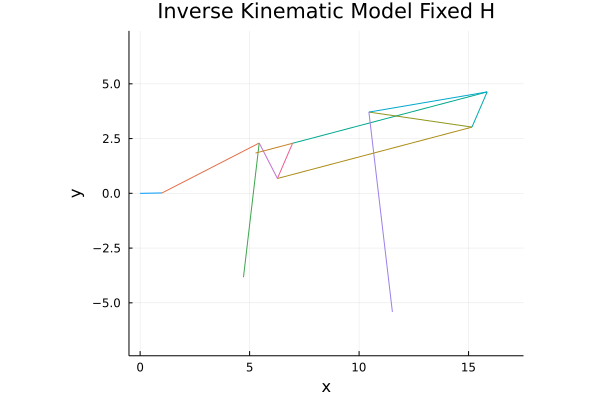

In [14]:
function inverse_kinematics3(xCoordinate, yCoordinate)
    #fixed H
    ptH = H_adap
    Δ₇ = ptH[1] - xCoordinate
    Δ₈ = ptH[2] - yCoordinate
    
    Lhp = sqrt(Δ₇^2 + Δ₈^2)
    γ = atan(abs(Δ₈/Δ₇))
    Lhj = Lhi + Lij
    Lpj = Ljl + Llp
    θ₅ = π - γ - acos((Lhj^2 - (Lhp^2 + Lpj^2)) / (-2 * Lpj * Lhp))
    ptL = [xCoordinate+Llp*cos(θ₅) yCoordinate+Llp*sin(θ₅)]
    ptJ = [xCoordinate+Lpj*cos(θ₅) yCoordinate+Lpj*sin(θ₅)]
    
    Δ₉ = ptH[1] - ptJ[1,1]
    Δ₁₀ = ptH[2] - ptJ[1,2]
    θ₆ = atan(Δ₁₀/Δ₉)
    
    ptI = ptJ - [Lij*cos(θ₆) Lij*sin(θ₆)]
    ptP₁ = [xCoordinate + Llp*cos(θ₅ + (π/6)) yCoordinate + Llp*sin(θ₅ + (π/6))]
    ptE = ptK = ptI - [Lik*cos(θ₅) Lik*sin(θ₅)]
    
    Δ₃ = ptE[1] - ptB[1]
    Δ₄ = ptE[2] - ptB[2]
    θ₄₁ = atan(abs(Δ₄/Δ₃))
    θ₄₂ = acos((Lde^2 - (Lbd^2 + Δ₃^2 + Δ₄^2 )) / (-2 * Lbd * sqrt(Δ₃^2 + Δ₄^2)))
    θ₄ = θ₄₁ + θ₄₂
    
    ptD = [ptB[1] + Lbd*cos(θ₄)  ptB[2] + Lbd*sin(θ₄)]
    Lce = sqrt(Lcd^2 + Lde^2)
    
    Δ₅ = ptE[1,1] - ptA[1,1]
    Δ₆ = ptE[1,2] - ptA[1,2]
    Lae = sqrt(Δ₅^2 + Δ₆^2)
    θ₁₁ = atan(abs(Δ₆/Δ₅))
    θ₁₂ = acos((Lce^2 - (Lac^2 + Lae^2)) / (-2 * Lac * Lae))
    θ₁ = θ₁₁ - θ₁₂
    ptC = [Lac*cos(θ₁) Lac*sin(θ₁)]

        
    plot([ptA[1,1],ptC[1,1]],[ptA[1,2],ptC[1,2]])
    plot!([ptC[1,1],ptD[1,1]],[ptC[1,2],ptD[1,2]])
    plot!([ptB[1],ptD[1,1]],[ptB[2],ptD[1,2]])
    plot!([ptD[1,1],ptE[1,1]],[ptD[1,2],ptE[1,2]])
    plot!([ptK[1,1],ptL[1,1]],[ptK[1,2],ptL[1,2]])
    plot!([ptL[1,1],ptJ[1,1]],[ptL[1,2],ptJ[1,2]])
    plot!([ptK[1,1],ptI[1,1]],[ptK[1,2],ptI[1,2]])
    plot!([ptI[1,1],ptH[1]],[ptI[1,2],ptH[2]])
    plot!([ptI[1,1],ptJ[1,1]],[ptI[1,2],ptJ[1,2]])
    plot!([ptL[1,1],ptP₁[1,1]],[ptL[1,2],ptP₁[1,2]])
    plot!([ptJ[1,1],ptP₁[1,1]],[ptJ[1,2],ptP₁[1,2]])
    plot!([xCoordinate,ptP₁[1,1]],[yCoordinate,ptP₁[1,2]])
    
    plot!(xlabel = "x", ylabel = "y",xlims=[0.,17.],ylims=[-7,7.])
    plot!(legend=false,aspect_ratio=:equal, title = "Inverse Kinematic Model Fixed H")
    

end


inverse_kinematics3(xCoordinate, yCoordinate)



In [15]:
xCoordinate = trajectP[1,1]  
yCoordinate = trajectP[1,2] 

-5.387567012029825

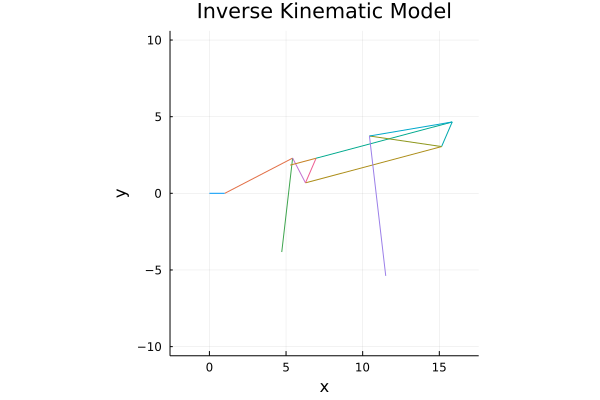

In [16]:
function inverse_kinematics4(xCoordinate, yCoordinate)
    Hₛ = -((H_base[2] - H_adap[2]) / (H_base[1] - H_adap[1])) ^ (-1)
    Hₘ = [(H_base[1] + H_adap[1])/2 (H_base[2] + H_adap[2])/2]
    H₁ = 2 #this is input
    H₂ = Hₛ * (H₁ - Hₘ[1]) + Hₘ[2]
    ptHⱼ = [H₁, H₂]
    dₕ₁ = sqrt.((ptHⱼ[1] .- H_base[1]).^2 .+ (ptHⱼ[2] .- H_base[2]).^2)
    dₕ₂ = sqrt.((ptHⱼ[1] .- Hₘ[1]).^2 .+ (ptHⱼ[2] .- Hₘ[2]).^2)
    dₕ₃ = sqrt.((ptHⱼ[1] .- H_adap[1]).^2 .+ (ptHⱼ[2] .- H_adap[2]).^2)
    dₕ₄ = sqrt.((ptHⱼ[1] .- H_adap[1]).^2 .+ (ptHⱼ[2] .- H₂).^2)
    θₕ₁ = acos(dₕ₄/dₕ₃)
    θₕ₂= 2 * acos(dₕ₂/dₕ₁)
    
    θₕ = range(θₕ₁,θₕ₂.+θₕ₁,length = N)
    global broke = false
    for i = 1:N
        global ptH = [H₁+(dₕ₁*cos(θₕ[i])) H₂+(dₕ₁*sin(θₕ[i]))]
        
        Δ₇ = ptH[1] - xCoordinate
        Δ₈ = ptH[2] - yCoordinate

        Lhp = sqrt(Δ₇^2 + Δ₈^2)
        γ = atan(abs(Δ₈/Δ₇))
        Lhj = Lhi + Lij
        Lpj = Ljl + Llp
        global θ₅ = π - γ - acos((Lhj^2 - (Lhp^2 + Lpj^2)) / (-2 * Lpj * Lhp))
        global ptL = [xCoordinate+Llp*cos(θ₅) yCoordinate+Llp*sin(θ₅)]
        global ptJ = [xCoordinate+Lpj*cos(θ₅) yCoordinate+Lpj*sin(θ₅)]

        Δ₉ = ptH[1] - ptJ[1,1]
        Δ₁₀ = ptH[2] - ptJ[1,2]
        θ₆ = atan(Δ₁₀/Δ₉)

        global ptI = ptJ - [Lij*cos(θ₆) Lij*sin(θ₆)]
        global ptP₁ = [xCoordinate + Llp*cos(θ₅ + (π/6)) yCoordinate + Llp*sin(θ₅ + (π/6))]
        global ptE = global ptK = ptI - [Lik*cos(θ₅) Lik*sin(θ₅)]

        Δ₃ = ptE[1] - ptB[1]
        Δ₄ = ptE[2] - ptB[2]
        global θ₄₁ = atan(abs(Δ₄/Δ₃))
        global arg = (Lde^2 - (Lbd^2 + Δ₃^2 + Δ₄^2)) / (-2 * Lbd * sqrt(Δ₃^2 + Δ₄^2))
        if abs(arg) <= 1
            θ₄₂ = acos(arg)
            θ₄ = θ₄₁ + θ₄₂

            global ptD = [ptB[1] + Lbd*cos(θ₄)  ptB[2] + Lbd*sin(θ₄)]
            
            Lce = sqrt(Lcd^2 + Lde^2)
    
            Δ₅ = ptE[1,1] - ptA[1,1]
            Δ₆ = ptE[1,2] - ptA[1,2]
            Lae = sqrt(Δ₅^2 + Δ₆^2)
            θ₁₁ = atan(abs(Δ₆/Δ₅))
            global arg2 = (Lce^2 - (Lac^2 + Lae^2)) / (-2 * Lac * Lae)
            if abs(arg2) <= 1
                θ₁₂ = acos(arg2)
                θ₁ = θ₁₁ - θ₁₂
                global ptC = [Lac*cos(θ₁) Lac*sin(θ₁)]
                if round(sqrt((ptC[1,1] - ptD[1,1])^2 + (ptC[1,2] - ptD[1,2])^2),digits=2) == Lcd
                    #println("worked")
                    global broke = true 
                    break
                end   
            end
            
        end
        
    
    end
    if broke == false
                println("never broke ", round(sqrt((ptC[1,1] - ptD[1,1])^2 + (ptC[1,2] - ptD[1,2])^2),digits=2))
            end
    
    plot([ptA[1,1],ptC[1,1]],[ptA[1,2],ptC[1,2]])
    plot!([ptC[1,1],ptD[1,1]],[ptC[1,2],ptD[1,2]])
    plot!([ptB[1],ptD[1,1]],[ptB[2],ptD[1,2]])
    plot!([ptD[1,1],ptE[1,1]],[ptD[1,2],ptE[1,2]])
    plot!([ptK[1,1],ptL[1,1]],[ptK[1,2],ptL[1,2]])
    plot!([ptL[1,1],ptJ[1,1]],[ptL[1,2],ptJ[1,2]])
    plot!([ptK[1,1],ptI[1,1]],[ptK[1,2],ptI[1,2]])
    plot!([ptI[1,1],ptH[1]],[ptI[1,2],ptH[2]])
    plot!([ptI[1,1],ptJ[1,1]],[ptI[1,2],ptJ[1,2]])
    plot!([ptL[1,1],ptP₁[1,1]],[ptL[1,2],ptP₁[1,2]])
    plot!([ptJ[1,1],ptP₁[1,1]],[ptJ[1,2],ptP₁[1,2]])
    plot!([xCoordinate,ptP₁[1,1]],[yCoordinate,ptP₁[1,2]])
    
    plot!(xlabel = "x", ylabel = "y",xlims=[-2.,17.],ylims=[-10.,10.])
    plot!(legend=false,aspect_ratio=:equal, title = "Inverse Kinematic Model")
end


inverse_kinematics4(xCoordinate, yCoordinate)



┌ Info: Saved animation to 
│   fn = C:\Users\juwon\Downloads\Research Polytechnique Montreal\circle4.gif
└ @ Plots C:\Users\juwon\.julia\packages\Plots\YAlrZ\src\animation.jl:114


Plots.AnimatedGif("C:\\Users\\juwon\\Downloads\\Research Polytechnique Montreal\\circle4.gif")
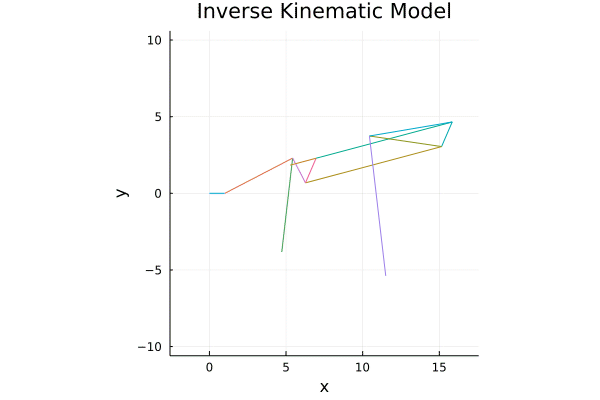

In [17]:
function animation4()
    anim = @animate for i in 1:3*N
    
       inverse_kinematics4(trajectP[i,1],trajectP[i,2])
        
    end
    
    gif(anim, "circle4.gif", fps = 10)
end

animation4()

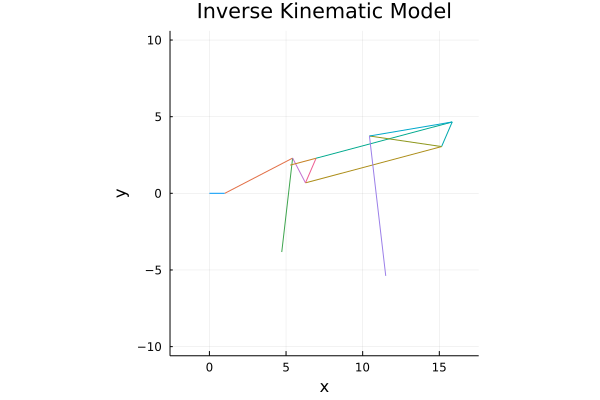

In [18]:
inverse_kinematics4(ptP[1,1],ptP[1,2])